In [1]:
# reference
# https://www.youtube.com/playlist?list=PLlMkM4tgfjnLSOjrEJN31gZATbcj_MpUm
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register

In [2]:
register(
    id='FrozenLake-v3',
    entry_point='gym.envs.toy_text:FrozenLakeEnv', kwargs={'map_name': '4x4', 'is_slippery': False}
)
env = gym.make('FrozenLake-v3')

In [3]:
Q = np.zeros([env.observation_space.n, env.action_space.n])
dis = .99
num_episodes = 2000
reward_list = []

In [4]:
for i in range(num_episodes):
    state = env.reset()
    reward_all = 0
    done = False
    
    while not done:
        action =  np.argmax(Q[state, :] + np.random.randn(1, env.action_space.n) / (i+1))
        new_state, reward, done,_ = env.step(action)
        Q[state,action] = reward + dis * np.max(Q[new_state,:])
        reward_all += reward
        state = new_state
    reward_list.append(reward_all)

Success rate:0.9345
Final Q-Table Values
[[ 0.          0.95099005  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.96059601  0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.970299    0.        ]
 [ 0.          0.9801      0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.99        0.        ]
 [ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          0.        ]]


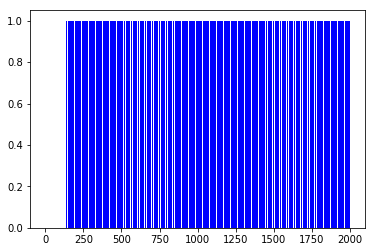

In [5]:
print("Success rate:" + str(sum(reward_list)/num_episodes))
print("Final Q-Table Values")
print(Q)
plt.bar(range(len(reward_list)), reward_list, color="blue")
plt.show()

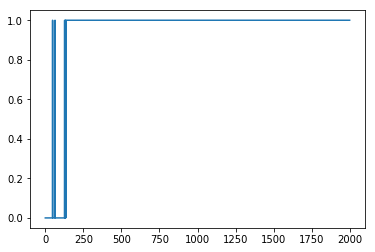

In [6]:
plt.plot(reward_list)
plt.show()